In this tutorial we show how to run ULTRAFAST for the ground state optimization of the Heisenberg model

\begin{equation}
\hat{H} = J_\text{ex}\sum_{\langle ij \rangle}\hat{S}_i \cdot \hat{S}_j
\end{equation}
defined on a $4\times 4$ lattice with $J_\text{ex}=1$.

The input data, such as network size, the optimization hyperparameters and model-dependent quantities used in this tutorial are set in the file "Examples/groundstate/main.jl". In particular, we initizilize an RBM with $\alpha=2$ and we perform 300 iterations with learning rate $\eta = 0.005$. We choose 2000 Monte Carlo samples and we parallelize the simulation across 3 workers (plus the master worker).

In [1]:
Alpha = 16
L = 4

include("src/main/main.jl")

# Starting ground state optimization for the Heisenberg Hamiltonian, with 16 = 4 x 4 spins and α=16
# Number of workers = 5
# The following hyper-parameters are used:
# Number of sweeps = 2000,  iteration step = 300,  learning rate = 0.005


Iteration step #10
Energy: -36.27030485726806 +- 102.58421334025377
 


Iteration step #20
Energy: -37.02124707068429 +- 103.09389907447243
 


Iteration step #30
Energy: -38.043124426594055 +- 87.52575824846365
 


Iteration step #40
Energy: -40.97792217690464 +- 41.27555809519376
 


Iteration step #50
Energy: -43.10531039394854 +- 15.035788088273948
 


Iteration step #60
Energy: -43.93432712992489 +- 7.745953712181898
 


Iteration step #70
Energy: -44.21959309855351 +- 6.610449045420908
 


Iteration step #80
Energy: -44.21154134157671 +- 6.868531896930411
 


Iteration step #90
Energy: -44.45001256826101 +- 7.689318686493961
 


Iteration step #100
Energy: -44.22805801958791 +- 5.598498693330176
 


Iteration step #110
Energy: -44.64570925585632 +- 2.46368545354229
 


Iteration step #120
Energy: -44.79825542199684 +- 0.9138172275339432
 


Iteration step #130
Energy: -44.83637006018283 +- 0.5448881521668149
 


Iteration step #140
Energy: -44.84115537346549 +- 0.37688552970558215
 


Iteration step #150
Energy: -44.85442431405395 +- 0.29135145818831215
 


Iteration step #160
Energy: -44.856168515208644 +- 0.16129094924513218
 


Iteration step #170
Energy: -44.8782073946171 +- 0.11524671171979119
 


Iteration step #180
Energy: -44.9101957970097 +- 0.06656793222845815
 


Iteration step #190
Energy: -44.91927404939878 +- 0.04703748082987603
 


Iteration step #200
Energy: -44.913126050931865 +- 0.03980017590439841
 


Iteration step #210
Energy: -44.91089676653582 +- 0.06046351976380221
 


Iteration step #220
Energy: -44.916765877018136 +- 0.026196214096642998
 


Iteration step #230
Energy: -44.916008339658845 +- 0.03421529709503701
 


Iteration step #240
Energy: -44.91488268688602 +- 0.023513586766821675
 


Iteration step #250
Energy: -44.91493773974494 +- 0.025465683561215653
 


Iteration step #260
Energy: -44.91432542500657 +- 0.016542269249663247
 


Iteration step #270
Energy: -44.90998181268113 +- 0.015106279499137888
 


Iteration step #280
Energy: -44.91144914420396 +- 0.016042775886811852
 


Iteration step #290
Energy: -44.91151343114133 +- 0.025587922078678427
 


Iteration step #300
Energy: -44.90756277027951 +- 0.02954400261845984
 
# ground state optimization completed
 


211.992261 seconds (5.61 M allocations: 3.192 GiB, 0.10% gc time, 0.66% compilation time)


The optiization looks successful! To better visualize this, let us plot the evolution of the energy and energy variance (stored respectively in the variables Energy_ and Variance_) during the ground state optimization. To this purpose we first import the Plots package. 

In [3]:
using Plots

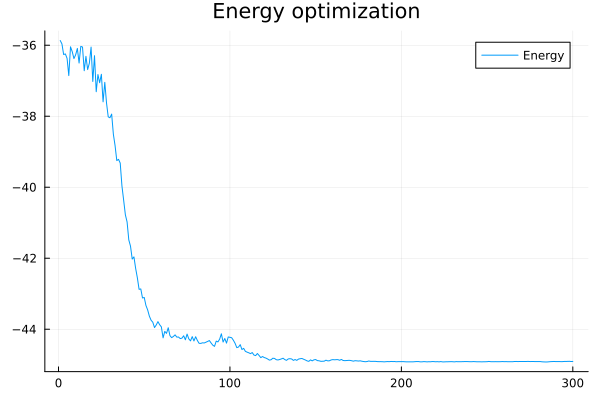

In [4]:
#Let's plot the evolution of the variational energy during the training
plot(collect(1:GS_HP.n_iter),Energy_,title = "Energy optimization", label = "Energy")

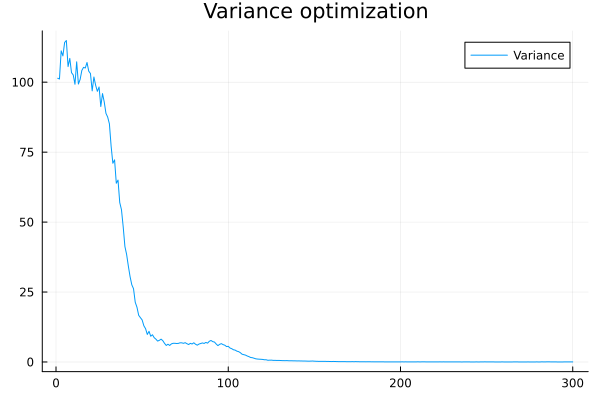

In [5]:
# Let's plot the evolution of the energy variance during the training
plot(collect(1:GS_HP.n_iter),Variance_,title = "Variance optimization", label = "Variance")

The (independent) network parameters obtained at the end of the ground state optimization are stored in the folder "src/output" and are termed "W_RBM_N_alpha_real.jl" for their real part, and "W_RBM_N_alpha_imag.jl" for their imaginary part. Now we upload them for later use.

In [6]:
#Upload trained network parameters
W_RBM = readdlm("W_RBM_$(nspins)_$(alpha)_real.jl") .+ im*readdlm("W_RBM_$(nspins)_$(alpha)_imag.jl");

With ULTRAFAST it is possible to evaluate the ground state spin-spin correlations

\begin{equation}
C(i,j) = \langle \hat{S}_i \cdot \hat{S}_j \rangle,
\end{equation}

for any $i,j$, with $i,j<=N$. This can be done by calling the function Spincorr_GS(), which returns the ground state value of $C(i,j)$ estimated over nSample states. Here, we choose nSample = 10000 and $i=1$, $j=2$.

In [12]:
nSample = 10000
result = Spincorr_GS(W_RBM[:], nSample, 1, 11)
# i_start = 1
# i_end = 34


# for i in i_start:i_end
#     result = Spincorr_GS(W_RBM[:], nSample, 1, 15)/2
#     println("i = $i, i+1 = $(i+1), Result = $result")
# end

